In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
df=pd.read_csv('homeprices_banglore.csv')
df.sample(5)


,area,bedrooms,price
17,1540,3,60.0
12,1000,2,38.0
14,2250,3,101.0
10,1800,3,82.0
13,1100,2,40.0


In [20]:
from sklearn.preprocessing import MinMaxScaler

sx=MinMaxScaler()
sy=MinMaxScaler()

scaled_X=sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [21]:
cost_list=[]
epoch_list=[]

def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    num_of_features=X.shape[1]

    w=np.ones(shape=(num_of_features))
    b=0
    total_samples=X.shape[0]

    for i in range(epochs):
        y_predicted=np.dot(w,scaled_X.T)+b
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(y_true-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list


w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)

w,b,cost

    

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

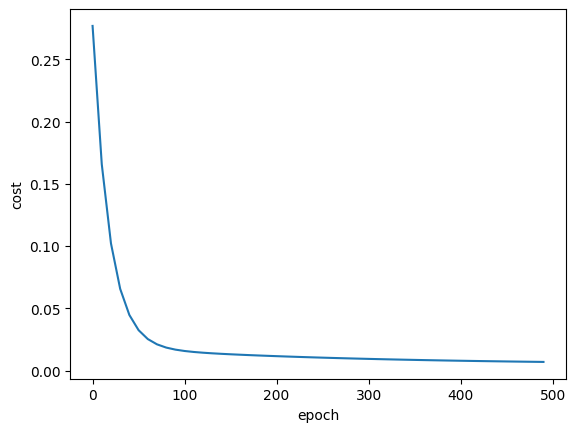

In [22]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [30]:
# predicting value with the updated weights


def predict(area,bedroom,w,b):
    scaled_X = sx.transform([[area, bedroom]])[0]

    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    
    return sy.inverse_transform([[scaled_price]])[0][0]


print(predict(1800,3,w,b))

79.35396924755915


/home/adi_techbuddy/anaconda3/envs/mycondaenv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [44]:
# Stochastic Gradient Descent

def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    num_of_features=X.shape[1]
    w=np.ones(shape=(num_of_features))
    b=0
    total_samples=X.shape[0]

    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        random_index=np.random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+b

        w_grad=-(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2/total_samples)*np.sum(sample_y-y_predicted)

        w=w-learning_rate*w_grad    
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(sample_y-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list


w_sgd,b_sgd,cost,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)

        



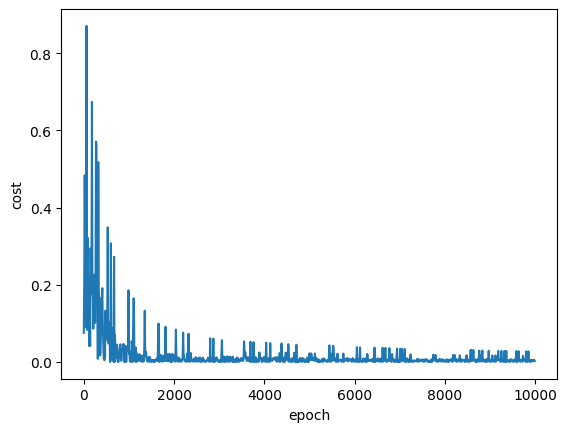

In [45]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [46]:
print(predict(1800,3,w,b))

77.86380617405298


/home/adi_techbuddy/anaconda3/envs/mycondaenv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
